# Udfordring: Analyse af tekst om Data Science

> *I denne notesbog eksperimenterer vi med at bruge forskellige URL'er - Wikipedia-artiklen om Machine Learning. Du kan se, at i modsætning til Data Science indeholder denne artikel mange fagudtryk, hvilket gør analysen mere problematisk. Vi skal finde en anden måde at rense dataene på efter at have udført nøgleordsudtrækning, for at slippe af med nogle hyppige, men ikke meningsfulde ordkombinationer.*

I dette eksempel laver vi en simpel øvelse, der dækker alle trin i en traditionel data science-proces. Du behøver ikke skrive nogen kode, du kan blot klikke på cellerne nedenfor for at udføre dem og observere resultatet. Som en udfordring opfordres du til at prøve denne kode med forskellige data.

## Mål

I denne lektion har vi diskuteret forskellige begreber relateret til Data Science. Lad os prøve at opdage flere relaterede begreber ved at lave noget **tekstanalyse**. Vi starter med en tekst om Data Science, udtrækker nøgleord fra den og forsøger derefter at visualisere resultatet.

Som tekst vil jeg bruge siden om Data Science fra Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Trin 1: Hentning af data

Første trin i enhver datavidenskabelig proces er at hente dataene. Vi vil bruge biblioteket `requests` til dette:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Trin 2: Transformering af data

Det næste trin er at konvertere dataene til en form, der er egnet til behandling. I vores tilfælde har vi downloadet HTML-kildekoden fra siden, og vi skal konvertere den til ren tekst.

Der er mange måder, dette kan gøres på. Vi vil bruge det enkleste indbyggede objekt, [HTMLParser](https://docs.python.org/3/library/html.parser.html), fra Python. Vi skal oprette en underklasse af `HTMLParser`-klassen og definere koden, der vil indsamle al tekst inden for HTML-tags, undtagen `<script>`- og `<style>`-tags.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Trin 3: Få indsigt

Det vigtigste trin er at omdanne vores data til en form, hvorfra vi kan udlede indsigt. I vores tilfælde ønsker vi at udtrække nøgleord fra teksten og se, hvilke nøgleord der er mest betydningsfulde.

Vi vil bruge et Python-bibliotek kaldet [RAKE](https://github.com/aneesha/RAKE) til nøgleordsudtrækning. Først skal vi installere dette bibliotek, hvis det ikke allerede er tilgængeligt:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Den primære funktionalitet er tilgængelig fra `Rake`-objektet, som vi kan tilpasse ved hjælp af nogle parametre. I vores tilfælde vil vi indstille den minimale længde af et nøgleord til 5 tegn, den minimale frekvens af et nøgleord i dokumentet til 3, og det maksimale antal ord i et nøgleord - til 2. Du er velkommen til at eksperimentere med andre værdier og observere resultatet.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Vi har fået en liste over termer sammen med deres tilknyttede vigtighedsgrad. Som du kan se, er de mest relevante discipliner, såsom maskinlæring og big data, placeret øverst på listen.

## Trin 4: Visualisering af resultatet

Folk forstår data bedst i visuel form. Derfor giver det ofte mening at visualisere dataene for at få nogle indsigter. Vi kan bruge `matplotlib`-biblioteket i Python til at lave en simpel fordeling af nøgleordene med deres relevans:


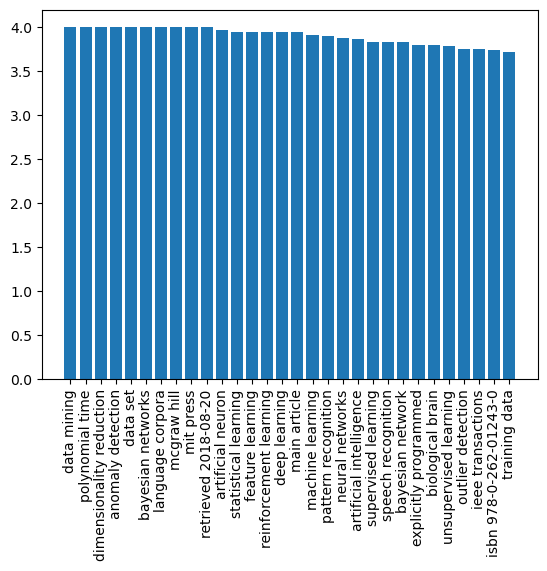

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Der er dog en endnu bedre måde at visualisere ordfrekvenser på - ved at bruge **Word Cloud**. Vi skal installere et andet bibliotek for at plotte word cloud fra vores nøgleordsliste.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet er ansvarligt for at tage enten originalteksten eller en forudberegnet liste over ord med deres frekvenser og returnerer et billede, som derefter kan vises ved hjælp af `matplotlib`:


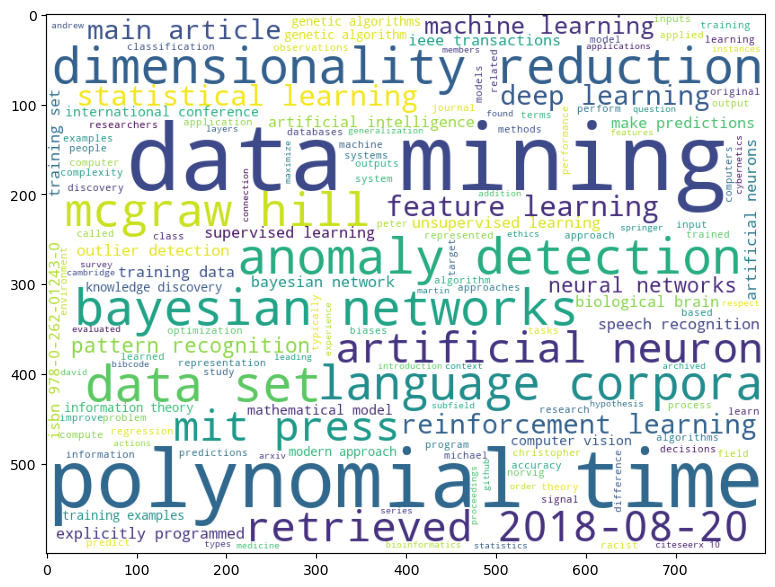

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Vi kan også indsætte den originale tekst i `WordCloud` - lad os se, om vi kan opnå et lignende resultat:


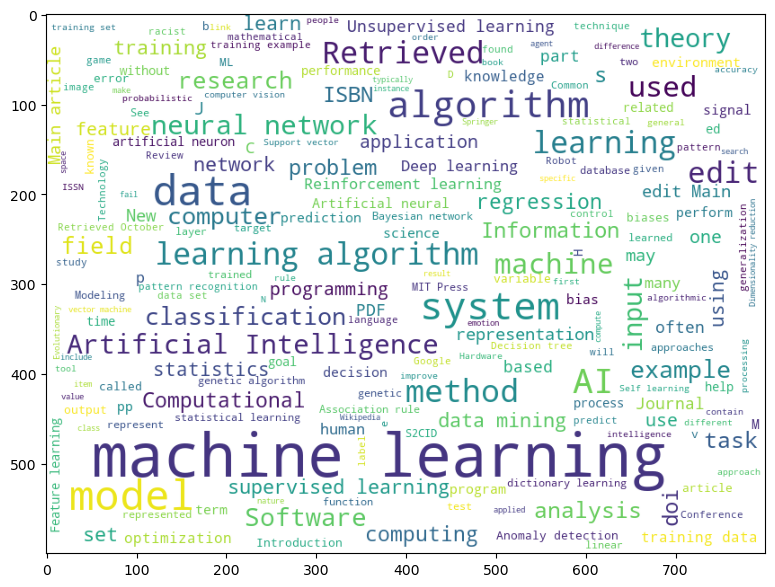

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se, at ordskyen nu ser mere imponerende ud, men den indeholder også en del støj (f.eks. uvedkommende ord som `Retrieved on`). Derudover får vi færre nøgleord, der består af to ord, såsom *data scientist* eller *computer science*. Dette skyldes, at RAKE-algoritmen gør et langt bedre stykke arbejde med at udvælge gode nøgleord fra teksten. Dette eksempel illustrerer vigtigheden af dataforbehandling og -rensning, da et klart billede i sidste ende giver os mulighed for at træffe bedre beslutninger.

I denne øvelse har vi gennemgået en simpel proces med at udtrække mening fra Wikipedia-tekst i form af nøgleord og en ordsky. Eksemplet er ret simpelt, men det viser tydeligt alle de typiske trin, en data scientist vil tage, når de arbejder med data, lige fra dataindsamling til visualisering.

I vores kursus vil vi gennemgå alle disse trin i detaljer.



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi påtager os intet ansvar for misforståelser eller fejltolkninger, der måtte opstå som følge af brugen af denne oversættelse.
